In [1]:
%run ../template.ipynb

In [84]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import scheduler_util
import app_data_mobilenets as app_data

In [23]:
all_apps = app_data.apps_by_name
latencies = app_data.model_desc['layer_latencies']

In [22]:
import os
import pickle

In [62]:
stream_fps = 15
fps_options = range(1, stream_fps + 1)
selected_apps = ['pedestrian', 'train', 'cars', 'schoolbus']

eventfreqs = [.001, .01, .025, .05, .075, .1, .2, .3, .4, .5, .7, .9, 1.]
# eventlens = [10, 50, 100, 250, 500, 750, 1000, 2000, 4000]
eventlens = [10, 50, 100, 250, 500, 1000, 4000]
corrs = [0, .1, .2, .3, .4, .5, .7, .9, 1.]
apps = [apps_by_name[appid] for appid in selected_apps]
# eventlen = app['event_length_ms']
# eventfreq = app['event_frequency']
# corr = app['correlation_coefficient']

if os.path.isfile('corr_f1.pkl'):
    with open('corr_f1.pkl') as f:
        df = pickle.load(f)
else:
    rows = []
    for app in apps:
        num_frozen_options = sorted(app['accuracies'].keys())
        for num_frozen, fps, corr, eventlen, eventfreq in itertools.product(num_frozen_options, fps_options, corrs, eventlens, eventfreqs):
            acc = app['accuracies'][num_frozen]
            prob_tnr = app['prob_tnrs'][num_frozen]
            f1 = scheduler_util.get_f1_score(acc, prob_tnr, eventlen, eventfreq, corr, stream_fps, fps)
            cost = scheduler_util.get_cost(num_frozen, fps, latencies)
            row = {
                'acc': acc,
                'prob_tnr': prob_tnr,
                'event_length_ms': eventlen,
                'event_frequency': eventfreq,
                'correlation_coefficient': corr,
                'stream_fps': stream_fps,
                'fps': fps,
                'num_frozen': num_frozen,
                'f1': f1,
                'cost': cost,
                'app': app['name'],
            }
            rows.append(row)
    df = pd.DataFrame(rows)
#     with open("corr_f1.pkl", "wb") as f:
#         pickle.dump(df, f, protocol=-1)

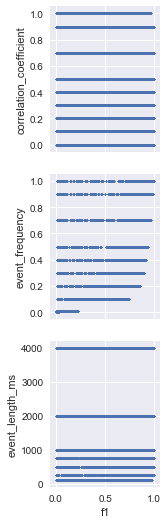

In [46]:
import seaborn as sns
aa = ['correlation_coefficient', 'event_frequency', 'event_length_ms']
# sns.pairplot(df, y_vars=aa, x_vars=['f1'], markers='+', plot_kws=dict(s=2, edgecolor="b", linewidth=1))

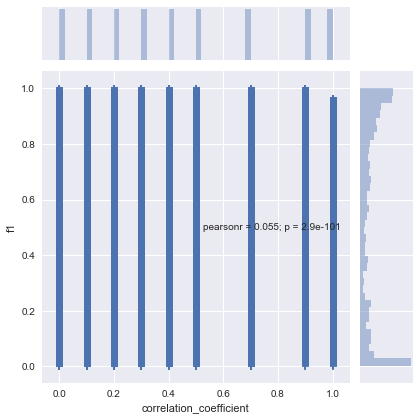

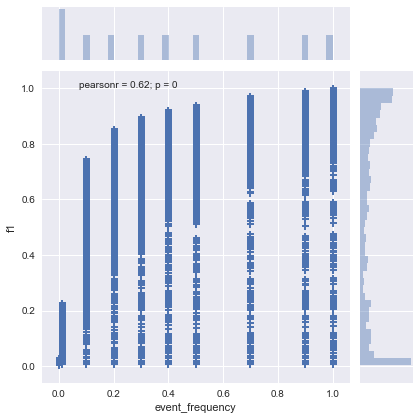

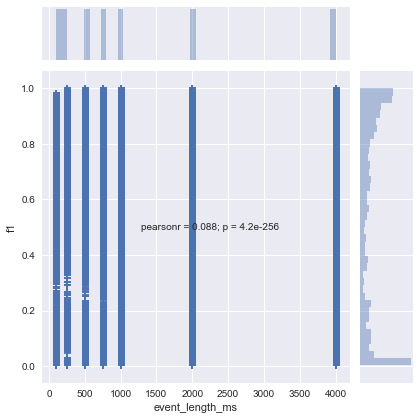

In [52]:
# for x in aa:
#     sns.jointplot(x, 'f1', data=df, joint_kws=dict(marker='+'))

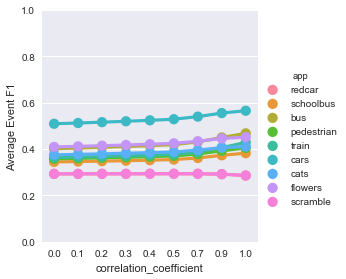

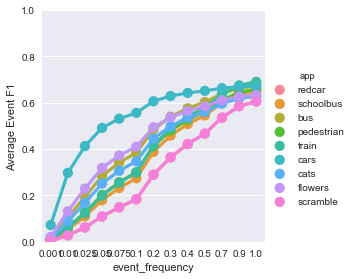

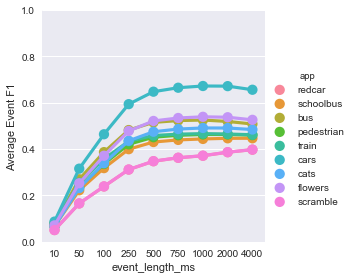

In [67]:
sns.set(rc={'figure.figsize':(18*2, 16*2)})
for x in aa:
    sns.factorplot(x=x, y='f1', hue='app', data=df, ci=95, joint_kws=dict(marker='+', s=1))
    grids.y.f1(None)

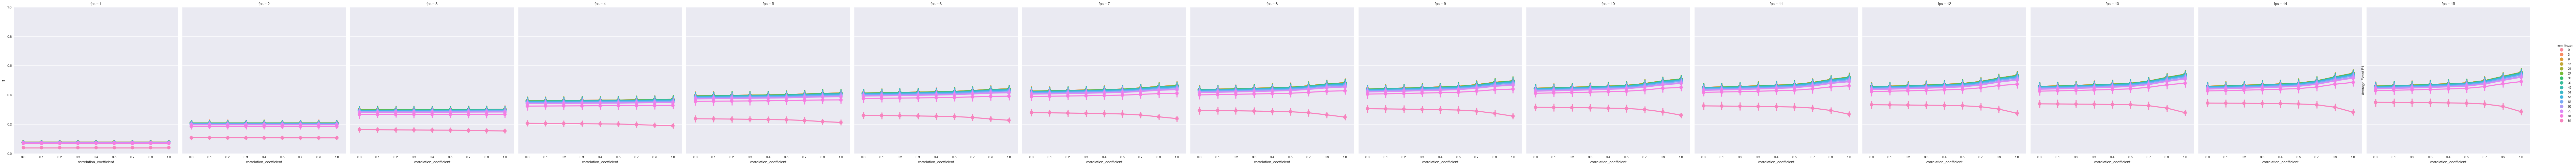

In [81]:
sns.set(rc={'figure.figsize':(18*2, 16*2)})
for x in aa:
    sns.factorplot(x=x, y='f1', hue='num_frozen', col='fps', data=df, ci=99, joint_kws=dict(marker='+', s=1), size=7)
    grids.y.f1(None)
    break

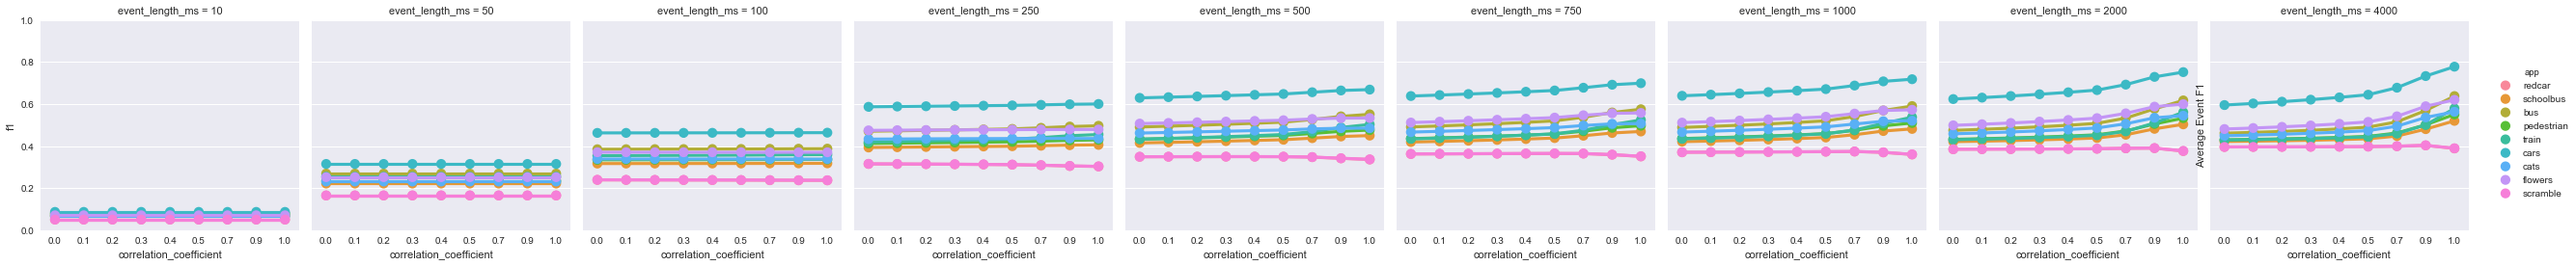

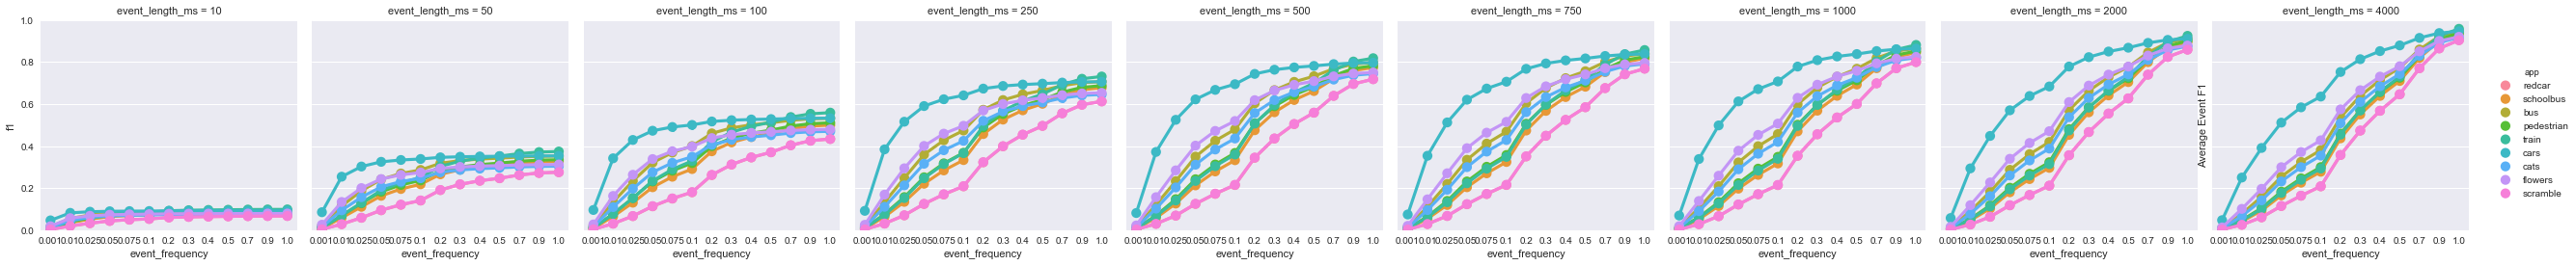

In [83]:
sns.set(rc={'figure.figsize':(18*2, 16*2)})
for x in ['correlation_coefficient', 'event_frequency']:
    sns.factorplot(x=x, y='f1', col='event_length_ms', hue='app', data=df, ci=95, joint_kws=dict(marker='+', s=1))
    grids.y.f1(None)

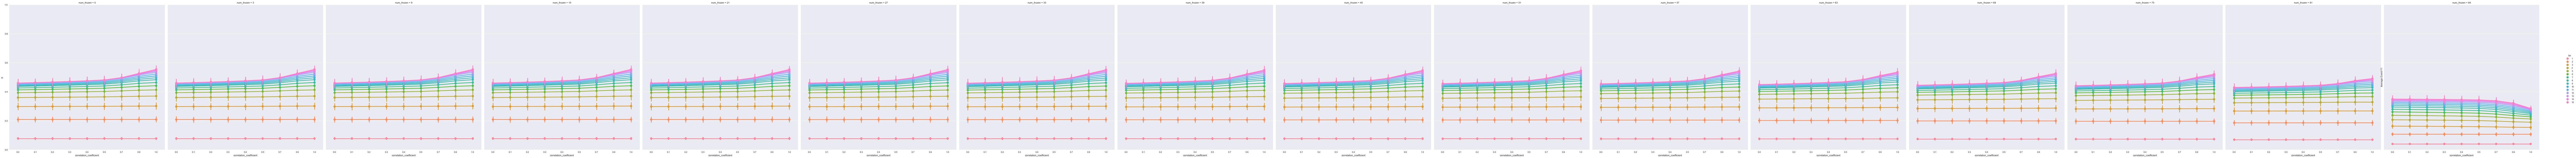

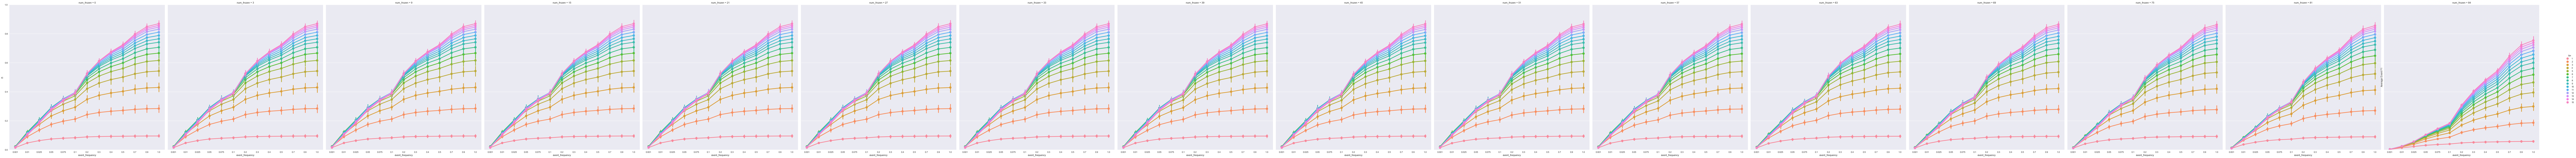

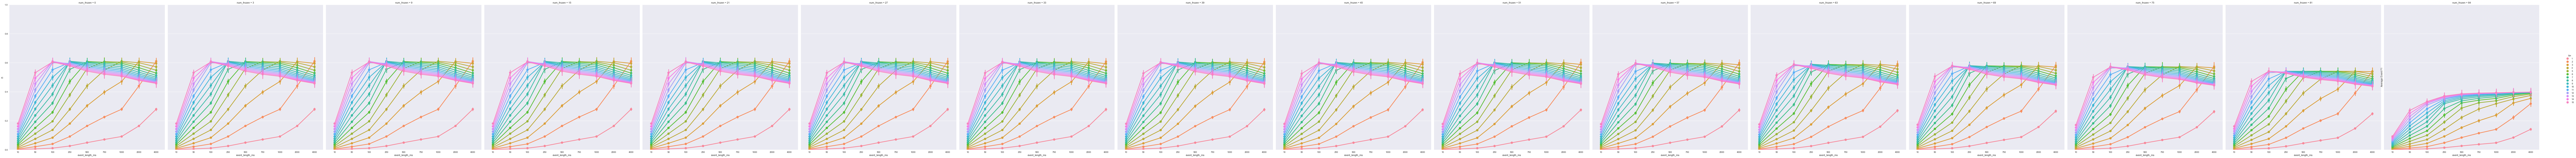

In [82]:
sns.set(rc={'figure.figsize':(18*2, 16*2)})
for x in aa:
    sns.factorplot(x=x, y='f1', hue='fps', col='num_frozen', data=df, ci=99, joint_kws=dict(marker='+', s=1), size=10)
    grids.y.f1(None)

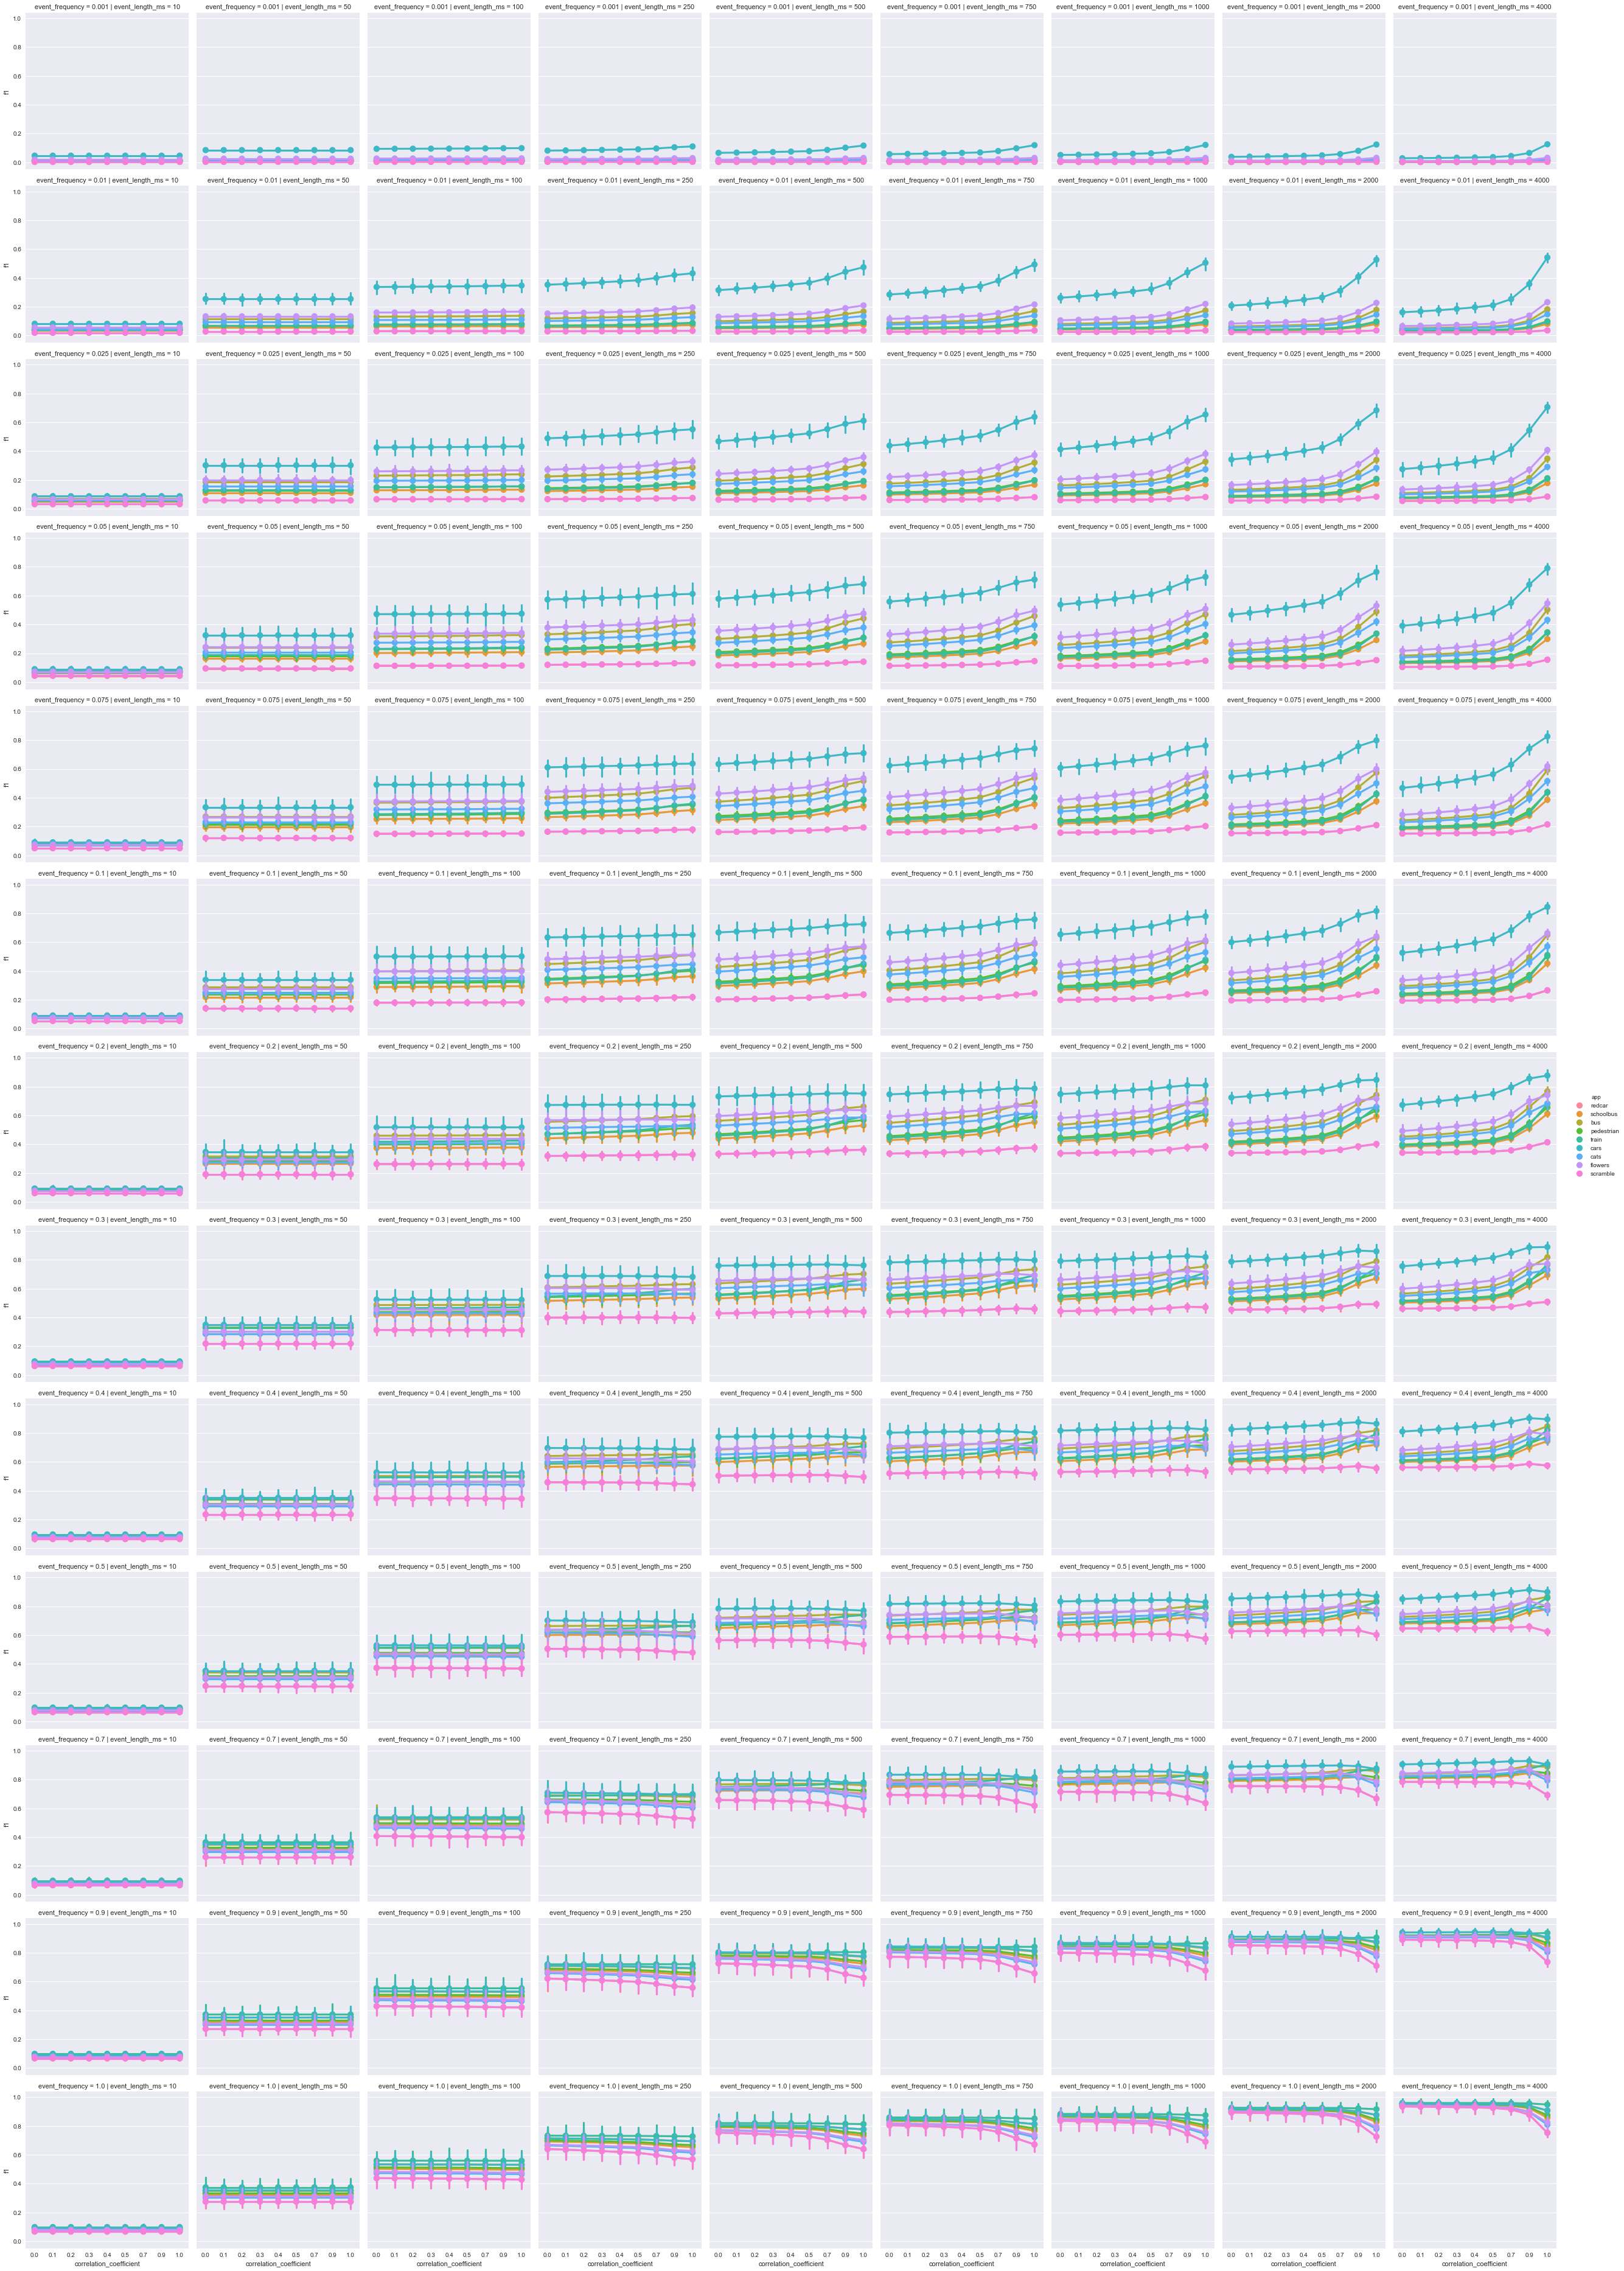

In [86]:
sns.set(rc={'figure.figsize':(18*2, 16*2)})
sns.factorplot(x='correlation_coefficient', y='f1', col='event_length_ms', row='event_frequency', hue='app', data=df, ci=100)

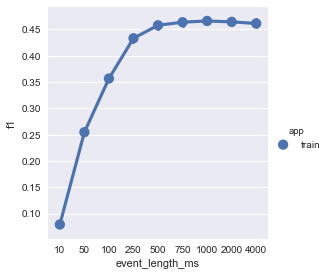

In [74]:
sns.factorplot(x=x, y='f1', hue='app', data=df[df['app'] == 'train'], ci=99.9)

In [75]:
# exp_id = "052518-sweep"
# series_names = ["mainstream", "maxsharing", "nosharing"]

# rows = []
# for series_name in series_names:
#     schedules = []
#     for num_apps in num_apps_range:
#         schedules += dataloaders.load_schedules(exp_id, "stems_2." + series_name + ".sim.*-" + str(num_apps) + ".v1", variant='v1+metrics', setups=setups)
#     # Extract some attributes from the schedules.
#     # Add on some based on the file name.
#     rows += ex(schedules,
#                each=lambda s: {'f1': mean(s.f1s), 'fps': mean(s.fpses), 'num_apps': s.num_apps, 'budget': s.budget},
#                constant={'scheduler': 'greedy', 'sharing': series_name})
# df = comb(rows)

NameError: name 'num_apps_range' is not defined